In [1]:
#Importing the required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#importing the dataset
df = pd.read_csv("/content/drive/MyDrive/BECO Submission/LP3_ML/Practical_1/uber.csv")


In [3]:
df.info() #To get the required information of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [4]:
df.columns #TO get number of columns in the dataset


Index(['Unnamed: 0', 'key', 'fare_amount', 'pickup_datetime',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count'],
      dtype='object')

In [5]:
df = df.drop(['Unnamed: 0', 'key'], axis= 1) #To drop unnamed column as it isn't required

In [6]:
df.shape #To get the total (Rows,Columns)

(200000, 7)

In [8]:
df.dtypes #To get the type of each column

fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [9]:
df.pickup_datetime = pd.to_datetime(df.pickup_datetime)

In [10]:
df.isnull().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [11]:
df.isnull().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [12]:
df= df.assign(hour = df.pickup_datetime.dt.hour,
 day= df.pickup_datetime.dt.day,
 month = df.pickup_datetime.dt.month,
 year = df.pickup_datetime.dt.year,
 dayofweek = df.pickup_datetime.dt.dayofweek)

In [17]:
from math import *
# function to calculate the travel distance from the longitudes and latitudes
def distance_transform(longitude1, latitude1, longitude2, latitude2):
 travel_dist = []

 for pos in range(len(longitude1)):
    long1,lati1,long2,lati2 = map(radians,[longitude1[pos],latitude1[pos],longitude2[pos],latitude2[pos]])
    dist_long = long2 - long1
    dist_lati = lati2 - lati1
    a = sin(dist_lati/2)**2 + cos(lati1) * cos(lati2) * sin(dist_long/2)**2
    c = 2 * asin(sqrt(a))*6371
    travel_dist.append(c)

 return travel_dist

In [18]:
df['dist_travel_km'] = distance_transform(df['pickup_longitude'].to_numpy(),
 df['pickup_latitude'].to_numpy(),
 df['dropoff_longitude'].to_numpy(),
 df['dropoff_latitude'].to_numpy()
 )

In [19]:
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,dayofweek,dist_travel_km
0,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,19,7,5,2015,3,1.683323
1,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,20,17,7,2009,4,2.457590
2,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,21,24,8,2009,0,5.036377
3,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,8,26,6,2009,4,1.661683
4,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,17,28,8,2014,3,4.475450


In [20]:
# drop the column 'pickup_daetime' using drop()
# 'axis = 1' drops the specified column
df = df.drop('pickup_datetime',axis=1)

fare_amount             AxesSubplot(0.125,0.787927;0.352273x0.0920732)
pickup_longitude     AxesSubplot(0.547727,0.787927;0.352273x0.0920732)
pickup_latitude         AxesSubplot(0.125,0.677439;0.352273x0.0920732)
dropoff_longitude    AxesSubplot(0.547727,0.677439;0.352273x0.0920732)
dropoff_latitude        AxesSubplot(0.125,0.566951;0.352273x0.0920732)
passenger_count      AxesSubplot(0.547727,0.566951;0.352273x0.0920732)
hour                    AxesSubplot(0.125,0.456463;0.352273x0.0920732)
day                  AxesSubplot(0.547727,0.456463;0.352273x0.0920732)
month                   AxesSubplot(0.125,0.345976;0.352273x0.0920732)
year                 AxesSubplot(0.547727,0.345976;0.352273x0.0920732)
dayofweek               AxesSubplot(0.125,0.235488;0.352273x0.0920732)
dist_travel_km       AxesSubplot(0.547727,0.235488;0.352273x0.0920732)
dtype: object

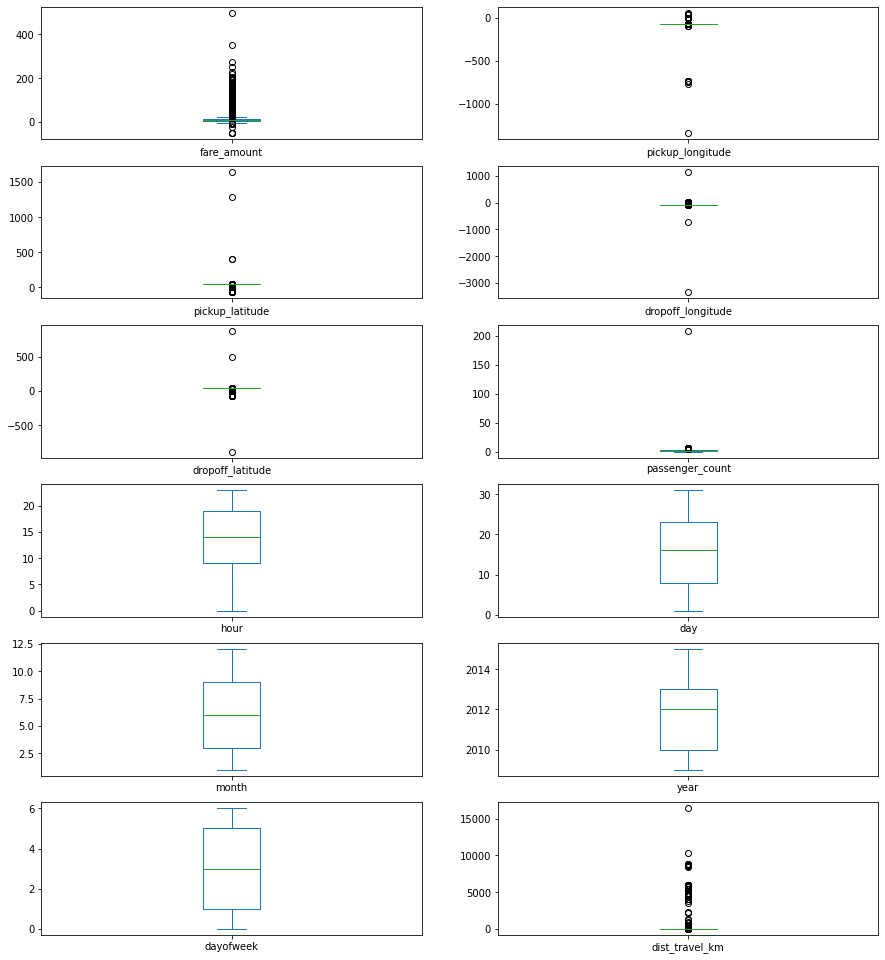

In [21]:
df.plot(kind = "box",subplots = True,layout = (7,2),figsize=(15,20)) #Boxplot to check the outliers

In [22]:
#Using the InterQuartile Range to fill the values
def remove_outlier(df1 , col):
  Q1 = df1[col].quantile(0.25)
  Q3 = df1[col].quantile(0.75)
  IQR = Q3 - Q1
  lower_whisker = Q1-1.5*IQR
  upper_whisker = Q3+1.5*IQR
  df[col] = np.clip(df1[col] , lower_whisker , upper_whisker)
  return df1
def treat_outliers_all(df1 , col_list):
  for c in col_list:
    df1 = remove_outlier(df , c)
  return df1


In [23]:
df = treat_outliers_all(df , df.iloc[: , 0::])

fare_amount             AxesSubplot(0.125,0.787927;0.352273x0.0920732)
pickup_longitude     AxesSubplot(0.547727,0.787927;0.352273x0.0920732)
pickup_latitude         AxesSubplot(0.125,0.677439;0.352273x0.0920732)
dropoff_longitude    AxesSubplot(0.547727,0.677439;0.352273x0.0920732)
dropoff_latitude        AxesSubplot(0.125,0.566951;0.352273x0.0920732)
passenger_count      AxesSubplot(0.547727,0.566951;0.352273x0.0920732)
hour                    AxesSubplot(0.125,0.456463;0.352273x0.0920732)
day                  AxesSubplot(0.547727,0.456463;0.352273x0.0920732)
month                   AxesSubplot(0.125,0.345976;0.352273x0.0920732)
year                 AxesSubplot(0.547727,0.345976;0.352273x0.0920732)
dayofweek               AxesSubplot(0.125,0.235488;0.352273x0.0920732)
dist_travel_km       AxesSubplot(0.547727,0.235488;0.352273x0.0920732)
dtype: object

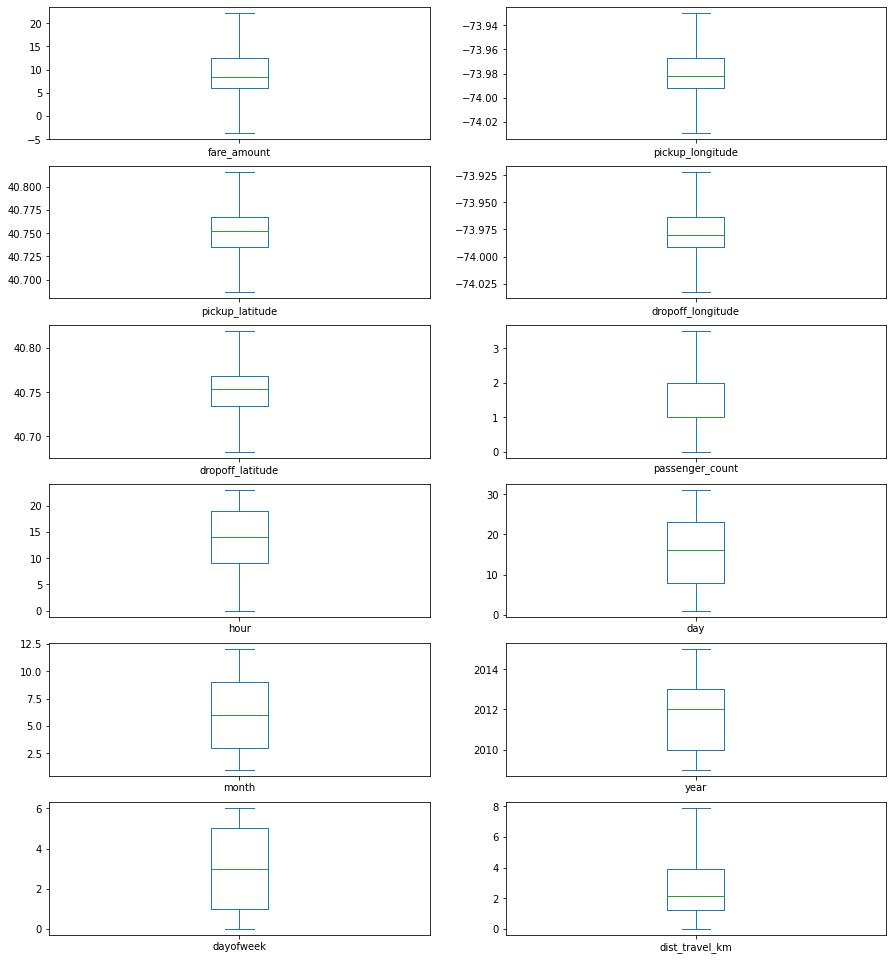

In [24]:
df.plot(kind = "box",subplots = True,layout = (7,2),figsize=(15,20)) #Boxplot shows that dataset is free from outliers

In [25]:
#Uber doesn't travel over 130 kms so minimize the distance
df= df.loc[(df.dist_travel_km >= 1) | (df.dist_travel_km <= 130)]
print("Remaining observastions in the dataset:", df.shape)

Remaining observastions in the dataset: (199999, 12)


In [26]:
#Finding inccorect latitude (Less than or greater than 90) and longitude (greater than or less than 180)
incorrect_coordinates = df.loc[(df.pickup_latitude > 90) |(df.pickup_latitude < -90) |
 (df.dropoff_latitude > 90) |(df.dropoff_latitude < -90) |
 (df.pickup_longitude > 180) |(df.pickup_longitude < -180) |
 (df.dropoff_longitude > 90) |(df.dropoff_longitude < -90)
 ]

In [27]:
df.drop(incorrect_coordinates, inplace = True, errors = 'ignore')

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [28]:
df.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,dayofweek,dist_travel_km
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1.0,19,7,5,2015,3,1.683323
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1.0,20,17,7,2009,4,2.457590
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1.0,21,24,8,2009,0,5.036377
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3.0,8,26,6,2009,4,1.661683
4,16.0,-73.929786,40.744085,-73.973082,40.761247,3.5,17,28,8,2014,3,4.475450


In [29]:
df.isnull().sum()

fare_amount          0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
hour                 0
day                  0
month                0
year                 0
dayofweek            0
dist_travel_km       0
dtype: int64

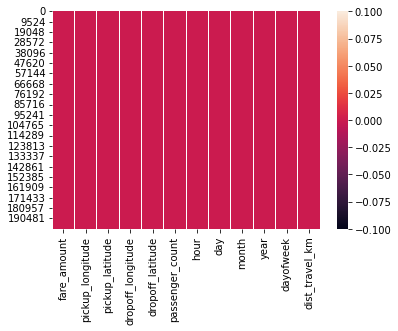

In [30]:
sns.heatmap(df.isnull()) #Free for null values

In [31]:
corr = df.corr() #Function to find the correlation

In [32]:
corr

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,dayofweek,dist_travel_km
fare_amount,1.000000,0.154056,-0.110856,0.218681,-0.125874,0.015798,-0.023605,0.004552,0.030815,0.141271,0.013664,0.844369
pickup_longitude,0.154056,1.000000,0.259492,0.425622,0.073309,-0.013202,0.011590,-0.003194,0.001168,0.010193,-0.024645,0.098076
pickup_latitude,-0.110856,0.259492,1.000000,0.048889,0.515736,-0.012879,0.029691,-0.001544,0.001561,-0.014247,-0.042304,-0.046824
dropoff_longitude,0.218681,0.425622,0.048889,1.000000,0.245670,-0.009304,-0.046560,-0.004008,0.002392,0.011347,-0.003337,0.186533
dropoff_latitude,-0.125874,0.073309,0.515736,0.245670,1.000000,-0.006329,0.019765,-0.003498,-0.001191,-0.009595,-0.031932,-0.038873
passenger_count,0.015798,-0.013202,-0.012879,-0.009304,-0.006329,1.000000,0.020260,0.002699,0.010353,-0.009743,0.048542,0.009729
hour,-0.023605,0.011590,0.029691,-0.046560,0.019765,0.020260,1.000000,0.004664,-0.003924,0.002162,-0.086956,-0.038348
day,0.004552,-0.003194,-0.001544,-0.004008,-0.003498,0.002699,0.004664,1.000000,-0.017358,-0.012165,0.005609,0.003080
month,0.030815,0.001168,0.001561,0.002392,-0.001191,0.010353,-0.003924,-0.017358,1.000000,-0.115860,-0.008785,0.011626
year,0.141271,0.010193,-0.014247,0.011347,-0.009595,-0.009743,0.002162,-0.012165,-0.115860,1.000000,0.006116,0.024270


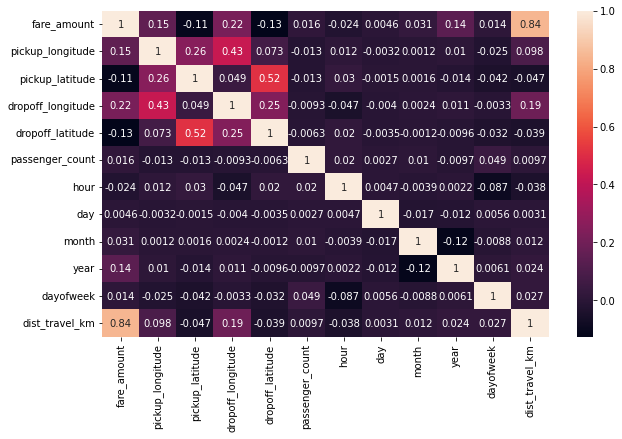

In [33]:
fig,axis = plt.subplots(figsize = (10,6))
sns.heatmap(df.corr(),annot = True) #Correlation Heatmap (Light values means highly correlated)

In [34]:
x = df[['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude','passenger_count','hour','day','month','year','dayofweek','dist_travel_km']]


In [38]:
y = df['fare_amount']

In [39]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size = 0.33)

In [40]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()

In [41]:
regression.fit(X_train,y_train)

LinearRegression()

In [42]:
regression.intercept_ #To find the linear intercept

2670.230514150575

In [43]:
regression.coef_ #To find the linear coeeficient


array([ 1.64531785e+01, -9.60098547e+00,  1.48162706e+01, -1.69781461e+01,
        6.03334352e-02,  8.67521771e-03,  2.69049592e-03,  5.77376692e-02,
        3.62854937e-01, -3.30346114e-02,  2.00045723e+00])

In [44]:
prediction = regression.predict(X_test) #To predict the target values

In [45]:
print(prediction)

[ 5.81828923  6.19077841 20.80713391 ... 23.32836211  8.59842667
  9.71660448]


In [46]:
y_test


42419      3.70
106310     5.70
191411    22.25
147       18.00
147479     4.50
          ...  
23604     14.90
145263    22.25
56644     22.25
71156      7.50
153391     9.70
Name: fare_amount, Length: 66000, dtype: float64

In [47]:
from sklearn.metrics import r2_score

In [48]:
r2_score(y_test,prediction)

0.75155324436557

In [49]:
from sklearn.metrics import mean_squared_error

In [50]:
MSE = mean_squared_error(y_test,prediction)


In [51]:
MSE


7.325956914587929

In [52]:
RMSE = np.sqrt(MSE)


In [53]:
RMSE

2.7066504973099

In [54]:
from sklearn.ensemble import RandomForestRegressor

In [57]:
rf = RandomForestRegressor(n_estimators=100) #Here n_estimators means number of trees you want to build before making the prediction

In [58]:
rf.fit(X_train,y_train)


RandomForestRegressor()

In [59]:
y_pred = rf.predict(X_test)

In [60]:
y_pred


array([ 4.817 ,  6.505 , 22.1735, ..., 18.7765,  7.41  ,  8.84  ])

In [61]:
R2_Random = r2_score(y_test,y_pred)

In [62]:
R2_Random

0.806307522254157

In [63]:

MSE_Random = mean_squared_error(y_test,y_pred)
MSE_Random


5.711415884752986

In [64]:
RMSE_Random = np.sqrt(MSE_Random)
RMSE_Random


2.3898568753699427